# BChron Age Model Plots

This Jupyter Notebook explores age models of the speleothem records considered for this publication. We load and plot the age models we generated for each record. The age modeling technique used here is BChron.

In [1]:
import pickle

import pyleoclim as pyleo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
with open('../data/holo_chrons_combined.pkl','rb') as handle:
    holo_chrons = pickle.load(handle)

with open('../data/preprocessed_series_dict.pkl','rb') as handle:
    series_dict = pickle.load(handle)

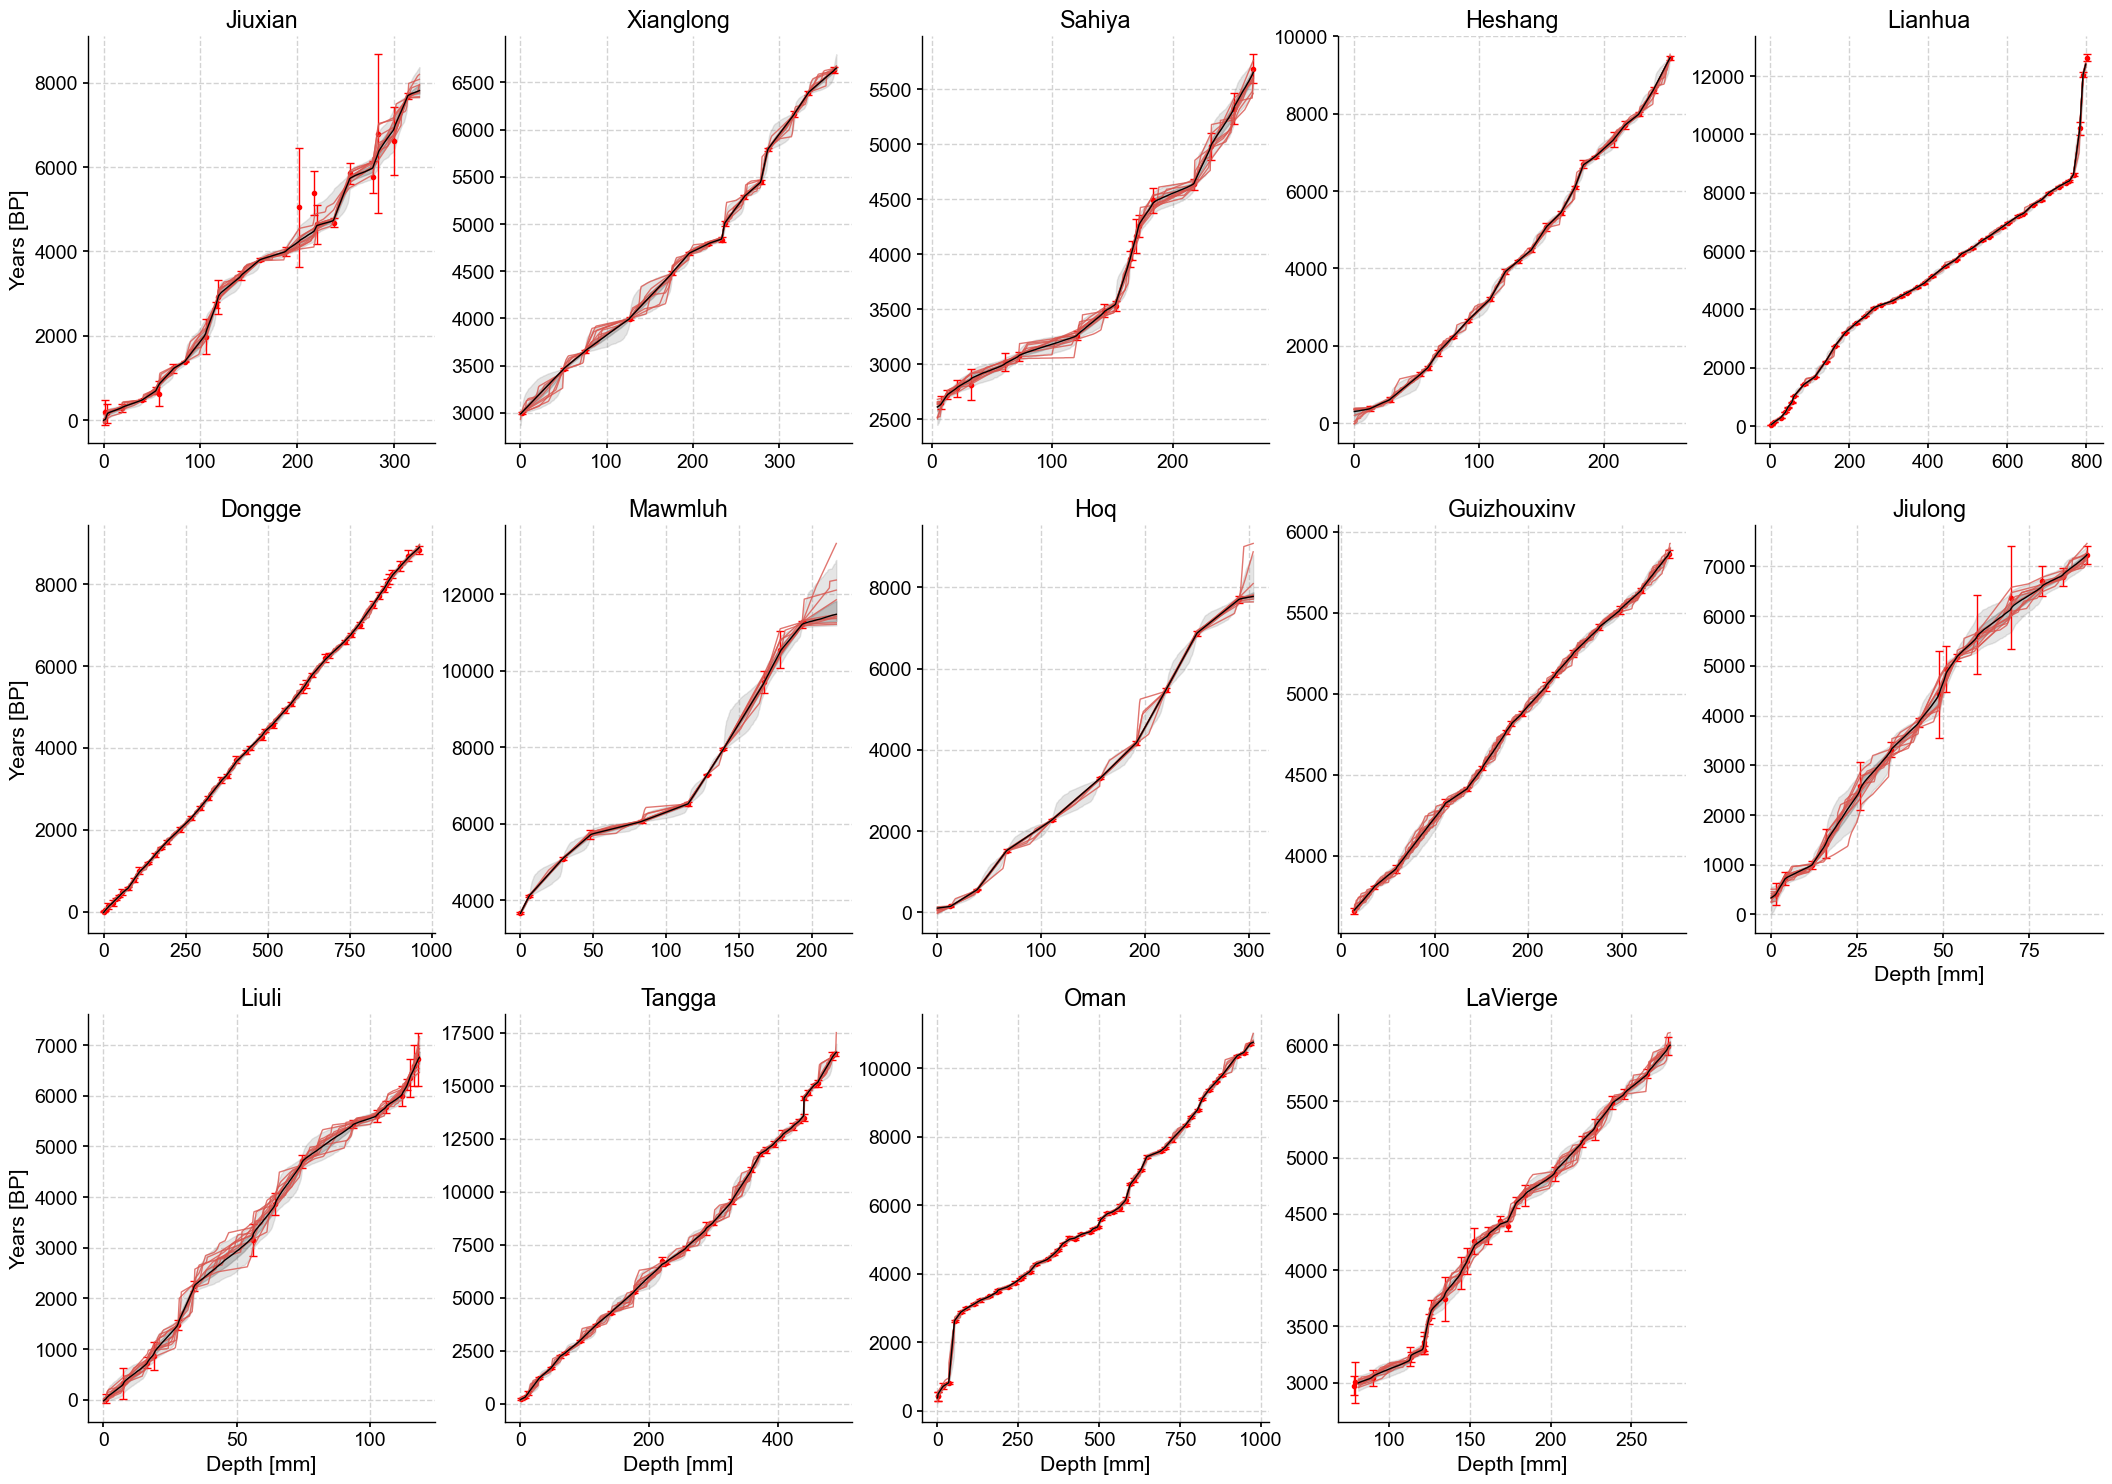

In [3]:
# Create a figure with 3 rows and 5 columns
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(26, 18))
axes = ax.ravel()

# Iterate over the keys in the series_dict dictionary
for idx, key in enumerate(series_dict.keys()):
    # Get the entry corresponding to the current key
    entry = holo_chrons[key]
    dating_age = entry['dating_age']
    depth_dating = entry['depth_dating']
    dating_error = entry['dating_error']
    
    # Create an EnsembleSeries object using the depth and chron data from the entry
    ens = pyleo.EnsembleSeries([pyleo.Series(time=entry['depth'],
                                             value=chron,
                                             time_name='Depth',
                                             time_unit='mm',
                                             value_name='Years',
                                             value_unit='BP',
                                             label=key,
                                             auto_time_params=False,
                                             verbose=False) for chron in entry['chron']])
    
    # Plot the traces and envelope of the ensemble series on the current axis
    ens.plot_traces(ax=axes[idx], lw=1, alpha=.8)
    ens.plot_envelope(ax=axes[idx], shade_clr='grey', curve_clr='black', curve_lw=1)
    
    # Plot the error bars representing dating age and dating error on the current axis
    axes[idx].errorbar(depth_dating, dating_age, yerr=dating_error, fmt='o', ms=3, capsize=3, elinewidth=1, color='red')
    
    # Set the title of the current axis to the key
    axes[idx].set_title(key)
    
    # Remove the legend from the current axis
    axes[idx].legend([])
    
    # Set the x-axis label to an empty string for the first 9 axes
    if idx < 9:
        axes[idx].set_xlabel('')
    
    # Set the y-axis label to an empty string for axes not in [0, 5, 10]
    if idx not in [0, 5, 10]:
        axes[idx].set_ylabel('')

# Remove the last axis from the figure
fig.delaxes(axes[-1])

In [4]:
pyleo.savefig(fig,'../figures/age_models.pdf')

Figure saved at: "../../figures/age_models.pdf"
